In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/

/content/drive


In [3]:
cd MyDrive

/content/drive/MyDrive


In [4]:
cd HyperTunedNNs

/content/drive/MyDrive/HyperTunedNNs


loading saved predictions and test scores


In [5]:
import pickle

def load_pickled_file(file_path):
    """
    Loads data from a pickled file.
    Args:
        file_path (str): Path to the pickled file.

    Returns:
        Any: The loaded data from the file.
    """
    try:
        with open(file_path, 'rb') as f:
            loaded_data = pickle.load(f)
        return loaded_data
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return None

real_y_test_all = load_pickled_file("real_y_test_all.pkl")
real_average = load_pickled_file("real_average.pkl")

train_average_predict_LSTM = load_pickled_file("train_average_predict_LSTM.pkl")
test_average_predict_LSTM = load_pickled_file("test_average_predict_LSTM.pkl")
testScore_LSTM = load_pickled_file("testScore_LSTM.pkl")

train_average_predict_RNN = load_pickled_file("train_average_predict_RNN.pkl")
test_average_predict_RNN = load_pickled_file("test_average_predict_RNN.pkl")
testScore_RNN = load_pickled_file("testScore_RNN.pkl")

train_average_predict_GRU = load_pickled_file("train_average_predict_GRU.pkl")
test_average_predict_GRU = load_pickled_file("test_average_predict_GRU.pkl")
testScore_GRU = load_pickled_file("testScore_GRU.pkl")
'''
train_average_predict_MLP = load_pickled_file("train_average_predict_MLP.pkl")
test_average_predict_MLP = load_pickled_file("test_average_predict_MLP.pkl")
testScore_MLP = load_pickled_file("testScore_MLP.pkl")
'''

'\ntrain_average_predict_MLP = load_pickled_file("train_average_predict_MLP.pkl")\ntest_average_predict_MLP = load_pickled_file("test_average_predict_MLP.pkl")\ntestScore_MLP = load_pickled_file("testScore_MLP.pkl")\n'

ploting test pred vs real data

Test Score LSTM: 0.000 RMSE
Test Score GRU: 0.000 RMSE
Test Score RNN: 0.000 RMSE


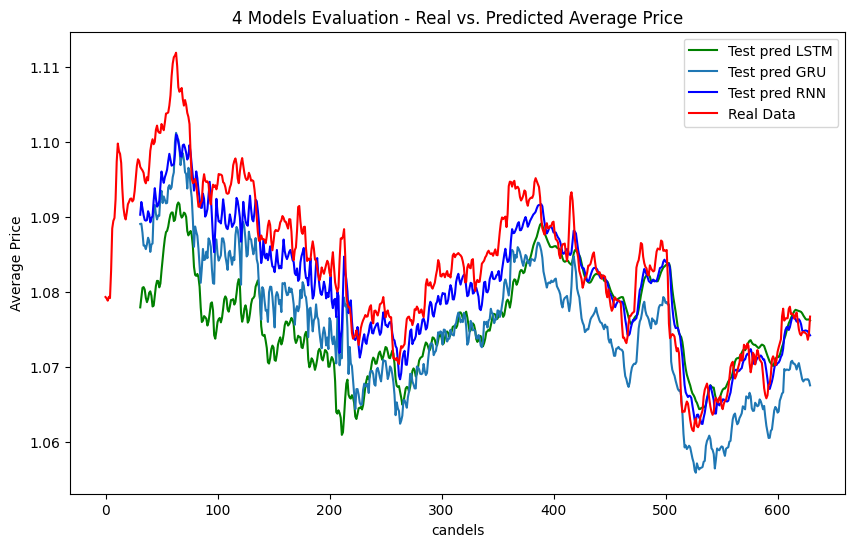

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import mean_squared_error

# Plot RMSE
print('Test Score LSTM: %.3f RMSE' % (testScore_LSTM))
print('Test Score GRU: %.3f RMSE' % (testScore_GRU))
print('Test Score RNN: %.3f RMSE' % (testScore_RNN))
#print('Test Score MLP: %.3f RMSE' % (testScore_MLP))

time_step = 30

testPredictPlot_LSTM = np.empty_like(real_y_test_all)
testPredictPlot_LSTM[:,:] = np.nan
testPredictPlot_LSTM[ time_step +1 :len(real_y_test_all) +1 ,:] = test_average_predict_LSTM

testPredictPlot_GRU = np.empty_like(real_y_test_all)
testPredictPlot_GRU[:,:] = np.nan
testPredictPlot_GRU[ time_step +1 :len(real_y_test_all) +1 ,:] = test_average_predict_GRU

testPredictPlot_RNN = np.empty_like(real_y_test_all)
testPredictPlot_RNN[:,:] = np.nan
testPredictPlot_RNN[ time_step +1 :len(real_y_test_all) +1 ,:] = test_average_predict_RNN
'''
testPredictPlot_MLP = np.empty_like(real_y_test_all)
testPredictPlot_MLP[:,:] = np.nan
testPredictPlot_MLP[ time_step +1 :len(real_y_test_all) +1 ,:] = test_average_predict_MLP
'''
plt.figure(figsize=(10, 6))
plt.plot(testPredictPlot_LSTM, color='green', label='Test pred LSTM')
plt.plot(testPredictPlot_GRU,  label='Test pred GRU')
plt.plot(testPredictPlot_RNN, color='blue', label='Test pred RNN')
#plt.plot(testPredictPlot_MLP, color='yellow', label='Test pred MLP')

plt.plot(real_y_test_all, color='red', label='Real Data')
plt.legend()
plt.xlabel('candels')
plt.ylabel('Average Price')
plt.title('4 Models Evaluation - Real vs. Predicted Average Price')
plt.savefig("/content/drive/MyDrive/HyperTunedNNs/pics/4 Models Evaluation - Real vs. Predicted Average Price.JPG")
plt.show()

ploting train and test pred vs real data

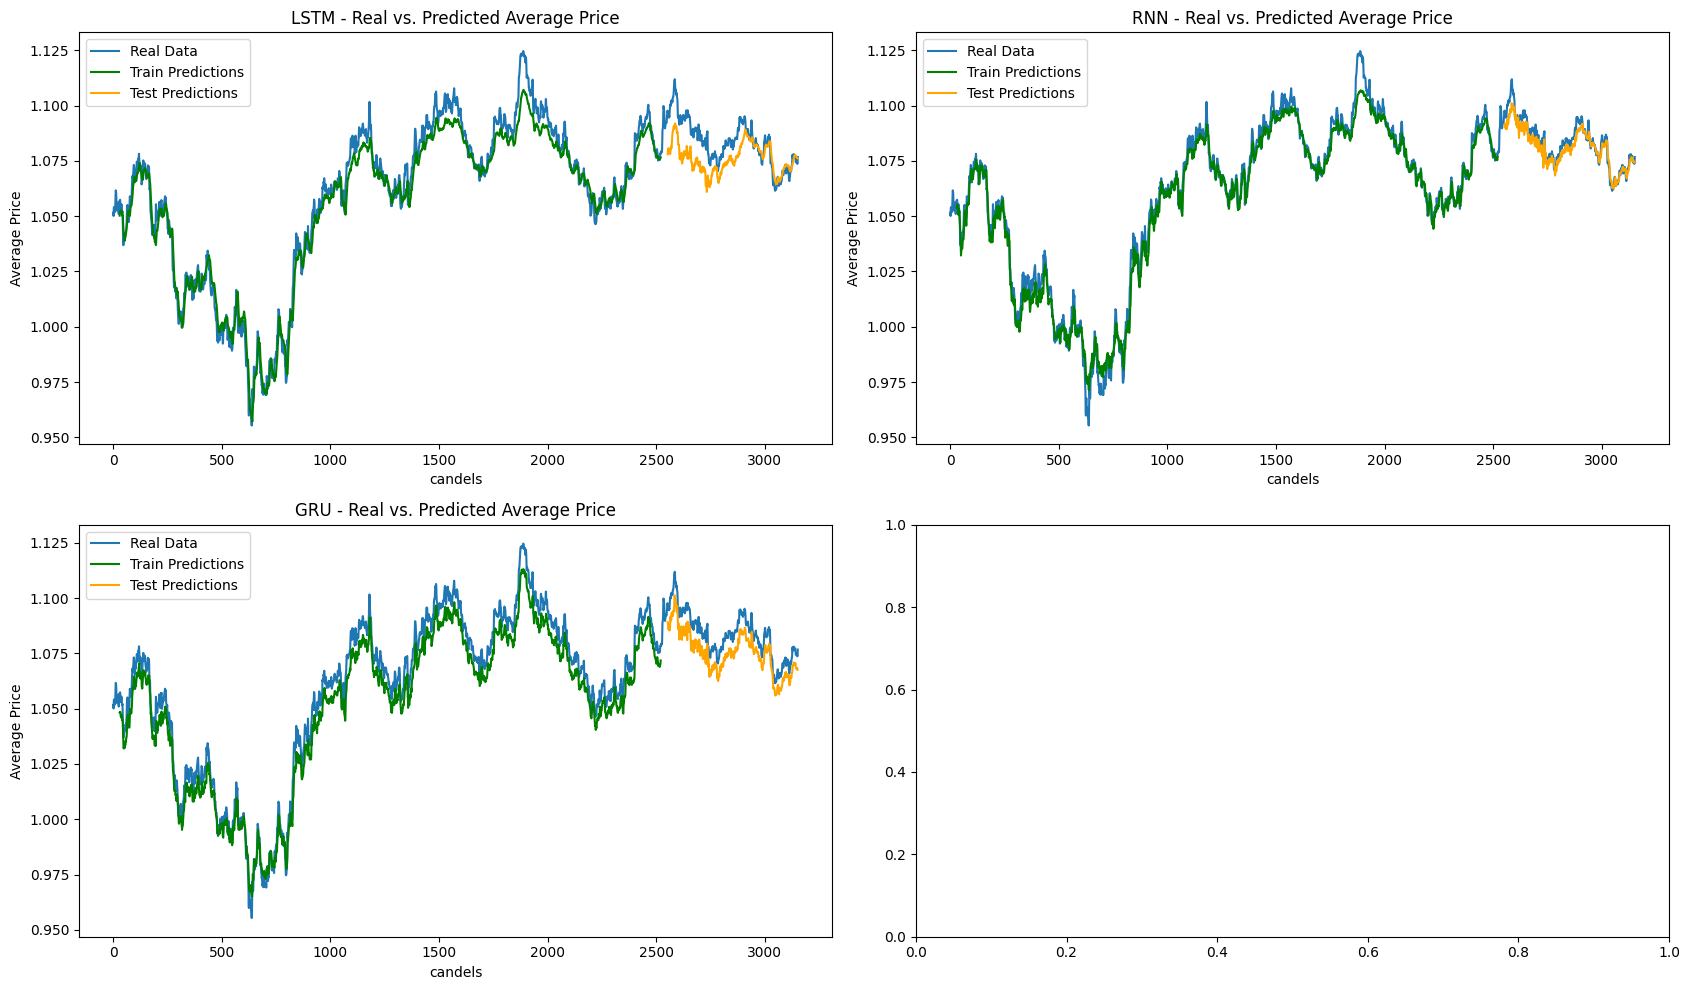

In [7]:
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

time_step = 30
# Create a new figure with 2 rows and 2 columns of subplots
fig, axs = plt.subplots(2, 2, figsize=(17,10))

# Plot real and predicted averages for LSTM
trainPredictPlot_LSTM = np.empty_like(real_average)
trainPredictPlot_LSTM[:, :] = np.nan
trainPredictPlot_LSTM[time_step:len(train_average_predict_LSTM) + time_step, :] = train_average_predict_LSTM
testPredictPlot_LSTM = np.empty_like(real_average)
testPredictPlot_LSTM[:, :] = np.nan
testPredictPlot_LSTM[len(train_average_predict_LSTM) + (time_step * 2) + 1 :len(real_average) -1, :] = test_average_predict_LSTM

axs[0, 0].plot(real_average,  label='Real Data')
axs[0, 0].plot(trainPredictPlot_LSTM, color='green', label='Train Predictions')
axs[0, 0].plot(testPredictPlot_LSTM, color='orange', label='Test Predictions')
axs[0, 0].set_title('LSTM - Real vs. Predicted Average Price')
axs[0, 0].set_xlabel('candels')
axs[0, 0].set_ylabel('Average Price')
axs[0, 0].legend()

# Plot real and predicted averages for RNN
trainPredictPlot_RNN = np.empty_like(real_average)
trainPredictPlot_RNN[:, :] = np.nan
trainPredictPlot_RNN[time_step:len(train_average_predict_RNN) + time_step, :] = train_average_predict_RNN
testPredictPlot_RNN = np.empty_like(real_average)
testPredictPlot_RNN[:, :] = np.nan
testPredictPlot_RNN[len(train_average_predict_RNN) + (time_step * 2) + 1 :len(real_average) -1, :] = test_average_predict_RNN

axs[0, 1].plot(real_average,  label='Real Data')
axs[0, 1].plot(trainPredictPlot_RNN, color='green', label='Train Predictions')
axs[0, 1].plot(testPredictPlot_RNN, color='orange', label='Test Predictions')
axs[0, 1].set_title('RNN - Real vs. Predicted Average Price')
axs[0, 1].set_xlabel('candels')
axs[0, 1].set_ylabel('Average Price')
axs[0, 1].legend()

# Plot real and predicted averages for GRU
trainPredictPlot_GRU = np.empty_like(real_average)
trainPredictPlot_GRU[:, :] = np.nan
trainPredictPlot_GRU[time_step:len(train_average_predict_GRU) + time_step, :] = train_average_predict_GRU
testPredictPlot_GRU = np.empty_like(real_average)
testPredictPlot_GRU[:, :] = np.nan
testPredictPlot_GRU[len(train_average_predict_GRU) + (time_step * 2) + 1 :len(real_average) -1, :] = test_average_predict_GRU

axs[1, 0].plot(real_average,  label='Real Data')
axs[1, 0].plot(trainPredictPlot_GRU, color='green', label='Train Predictions')
axs[1, 0].plot(testPredictPlot_GRU, color='orange', label='Test Predictions')
axs[1, 0].set_title('GRU - Real vs. Predicted Average Price')
axs[1, 0].set_xlabel('candels')
axs[1, 0].set_ylabel('Average Price')
axs[1, 0].legend()
'''
# Plot real and predicted averages for MLP
trainPredictPlot_MLP = np.empty_like(real_average)
trainPredictPlot_MLP[:, :] = np.nan
trainPredictPlot_MLP[time_step:len(train_average_predict_MLP) + time_step, :] = train_average_predict_MLP
testPredictPlot_MLP = np.empty_like(real_average)
testPredictPlot_MLP[:, :] = np.nan
testPredictPlot_MLP[len(train_average_predict_MLP) + (time_step * 2) + 1 :len(real_average) -1, :] = test_average_predict_MLP

axs[1, 1].plot(real_average,  label='Real Data')
axs[1, 1].plot(trainPredictPlot_MLP, color='green', label='Train Predictions')
axs[1, 1].plot(testPredictPlot_MLP, color='orange', label='Test Predictions')
axs[1, 1].set_title('MLP - Real vs. Predicted Average Price')
axs[1, 1].set_xlabel('candels')
axs[1, 1].set_ylabel('Average Price')
axs[1, 1].legend()
'''
# Show the plot
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/HyperTunedNNs/pics/4 Models comparison.JPG")
plt.show()
